In [49]:
#testing california house dataset cuz i'm retarded
from sklearn.datasets import _california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=_california_housing.fetch_california_housing()
X=data.data
y=data.target.reshape(-1,1)
colnames=data.feature_names+data.target_names
df=pd.DataFrame(np.concatenate((X,y), axis=1), columns=colnames)
print(f'Before Cleaning: {len(df)}')
df.head()

Before Cleaning: 20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


After Cleaning: 20495


<Axes: >

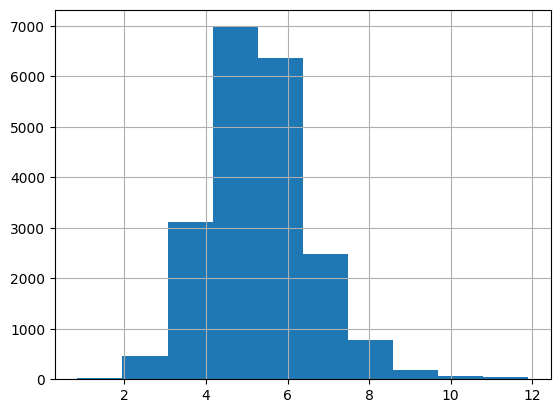

In [50]:
#sql sql thing cuz imma test em out lol!
#also data cleaning

#show average Rooms more than 100
df[df["AveRooms"]>100]

#we gonna pick average room below 11, cuz there's no fucking way someone has room more than 11
df=df[df["AveRooms"]<12]
print(f'After Cleaning: {len(df)}')

#making a histo of the current averooms
df["AveRooms"].hist()

Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []


<Axes: >

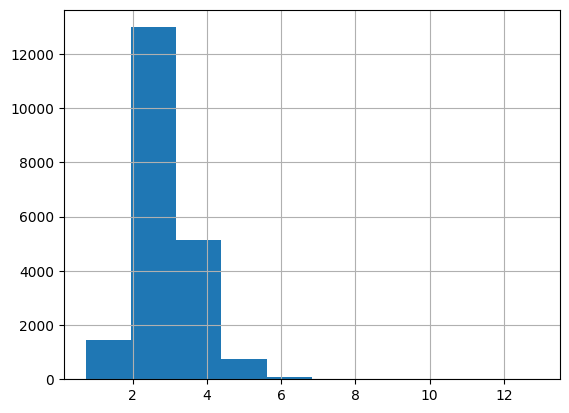

In [52]:
#check number of districts where aveoccup is >13
print(df[df["AveOccup"]>13])

#there's no way 1200 people live in the same house bruh.
df=df[df["AveOccup"]<13]
#visualizing occup <=13
df["AveOccup"][df["AveOccup"]<=13].hist()

<Axes: xlabel='Population', ylabel='MedHouseVal'>

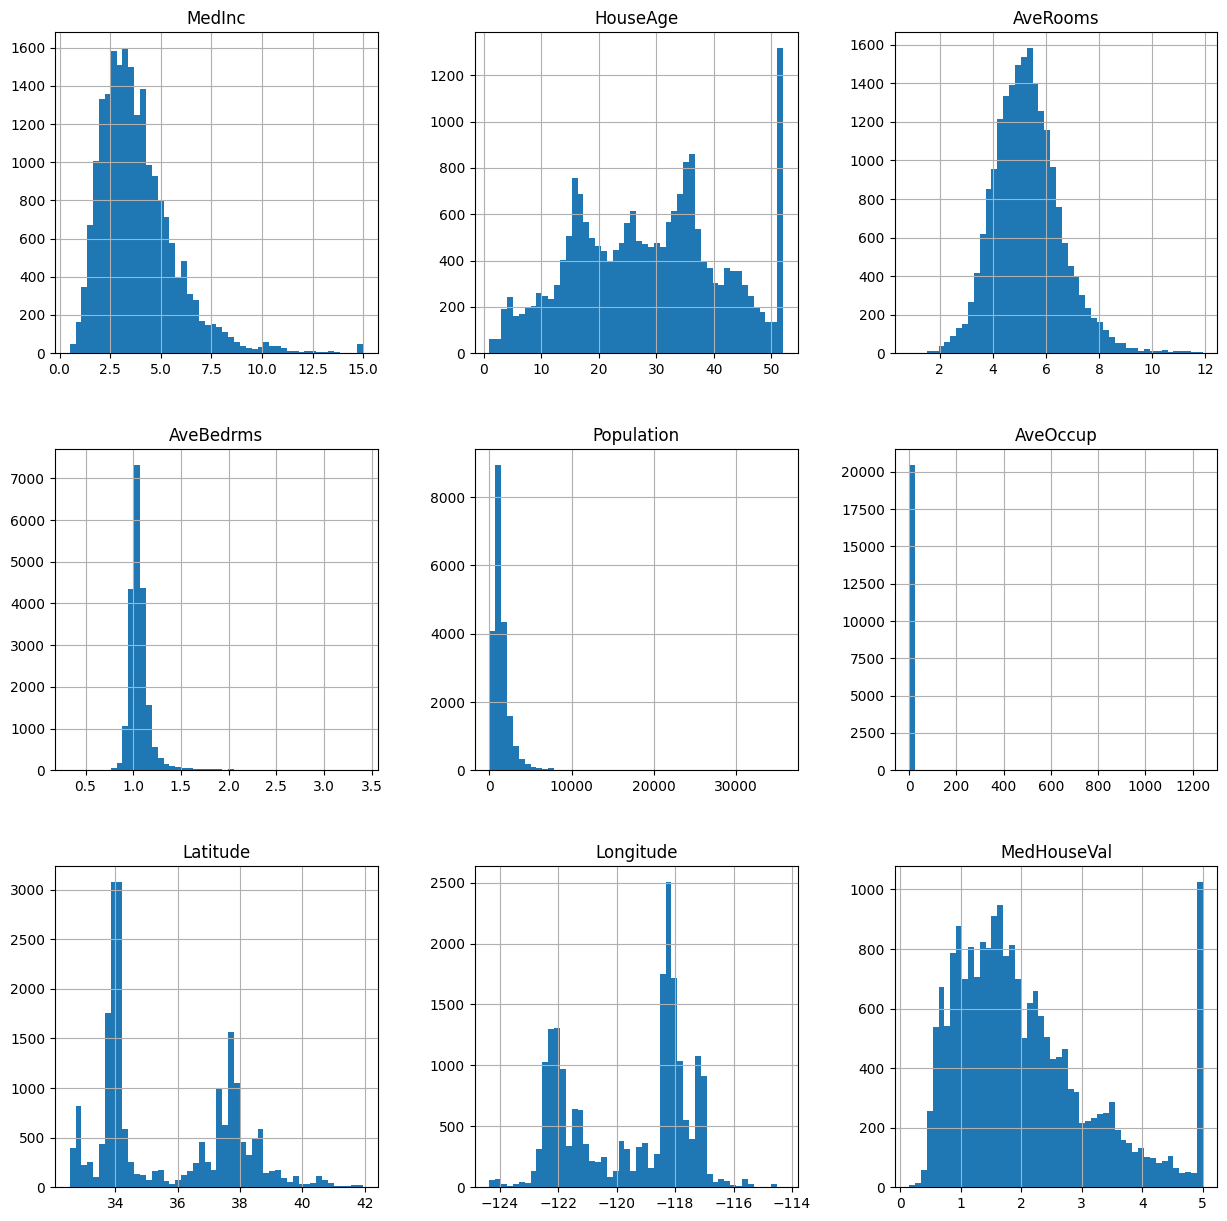

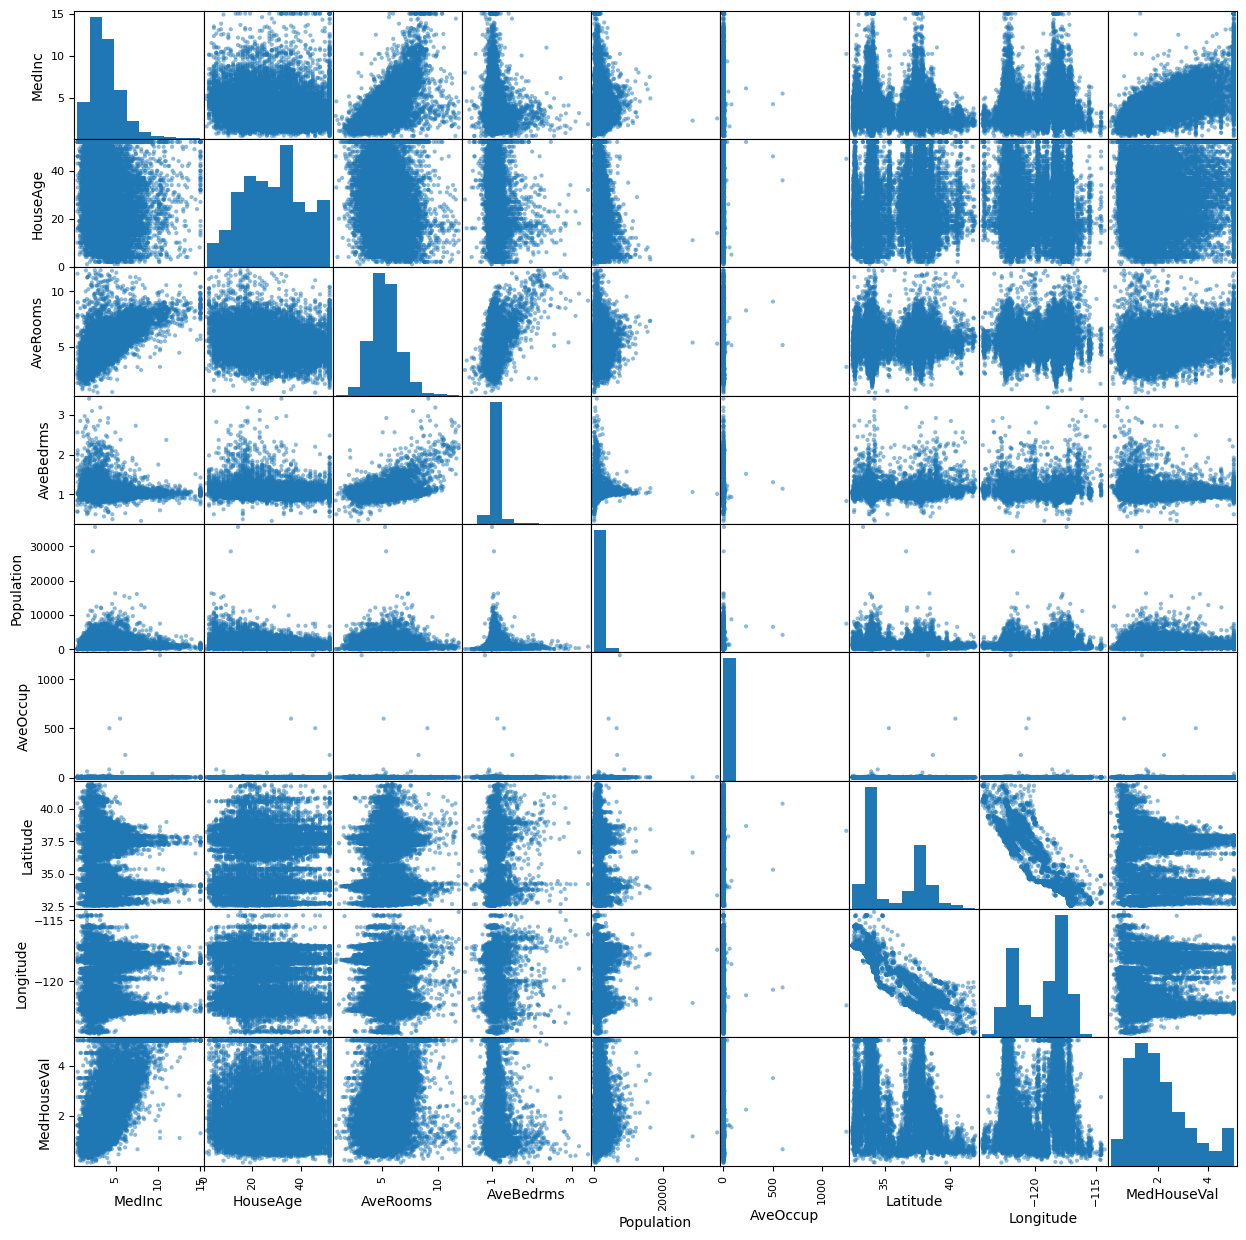

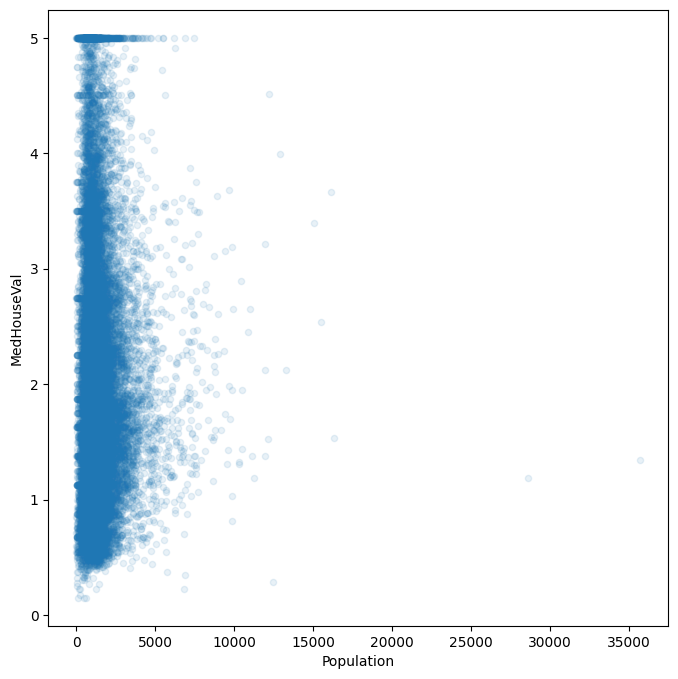

In [9]:
#Matrixplot blablabla
df.hist(bins=50, figsize=(15,15))
pd.plotting.scatter_matrix(df[colnames], figsize=(15,15))
#pd.plotting.autocorrelation_plot(df[colnames])

df.plot(kind="scatter", x="Population", y="MedHouseVal", figsize=(8,8), alpha=0.1)

In [61]:
from sklearn.model_selection import train_test_split
train_data,test_data, train_label, test_label = train_test_split(data.data, data.target, train_size=0.8)

#get model
from sklearn.neural_network import MLPRegressor

'''
for activ in ['relu', 'identity', 'logistic', 'tanh']:
    ANN=MLPRegressor(solver="lbfgs", max_iter=2000, alpha=1e-5, random_state=12343, hidden_layer_sizes=[5,], activation=activ)
    ANN.fit(train_data, train_label)
    print(ANN.score(train_data, train_label))
'''
#tanh has a better score
ANN=MLPRegressor(solver="lbfgs", max_iter=10000, alpha=1e-5, random_state=12343, hidden_layer_sizes=[25,2], activation="tanh")
ANN.fit(train_data, train_label)
print(ANN.score(train_data, train_label))


from sklearn.metrics import r2_score
Predicted=ANN.predict(test_data)

print(r2_score(test_label, Predicted))

0.6276024832916165
0.6260737591792769


In [62]:
#the score is shit, we gotta preproccess the data Jesse.
print(df.describe())
import numpy as np
#winsorize
from scipy.stats.mstats import winsorize
table=np.concatenate((data.data, data.target.reshape(-1,1)), axis=1)
tablewinsor=winsorize(table)
dfwins=pd.DataFrame(tablewinsor, columns=colnames)
print(dfwins.describe())

#standarize
from sklearn.preprocessing import scale
dfwinsscaled=scale(dfwins)

train_data,test_data, train_label, test_label = train_test_split(dfwinsscaled[:,0:8], dfwinsscaled[:,8], train_size=0.8)
ANN=MLPRegressor(solver="lbfgs", max_iter=10000, alpha=1e-5, random_state=12343, hidden_layer_sizes=[25, 2], activation="tanh")

ANN.fit(train_data, train_label)
print(ANN.score(train_data, train_label))                       #Better score than earlier cuh

Predicted=ANN.predict(test_data)

print(r2_score(test_label, Predicted))

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20472.000000  20472.000000  20472.000000  20472.000000  20472.000000   
mean       3.870082     28.714635      5.297232      1.069868   1430.546893   
std        1.895834     12.570300      1.273256      0.143521   1128.646025   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.562500     18.000000      4.435056      1.005768    793.000000   
50%        3.534600     29.000000      5.219704      1.048123   1171.000000   
75%        4.744700     37.000000      6.027120      1.097918   1728.000000   
max       15.000100     52.000000     11.901869      3.411111  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20472.000000  20472.000000  20472.000000  20472.000000  
mean       2.927483     35.621356   -119.572895      2.071202  
std        0.798059      2.130660      2.003907      1.154780  
min        0.750000     32.54000